In [1]:
!ls

2010 Federal STEM Education Inventory Data Set.xls
Untitled.ipynb
task.txt


In [1024]:
!cat task.txt

Create a public repo called ml_stem_analysis on github and share with us.
 
Data: https://data.world/education/2010-federal-stem-inventory/file/2010%20Federal%20STEM%20Education%20Inventory%20Data%20Set.xls
 
Stage 1:
1) Calculate % growth of funding between year 2008 & 2009.
2) If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable.
 
Stage 2:
1) Create graphs of univariate distribution of all non funding variables and share on a jupyter notebook. Just FYI - Funding FY2008, FY2009, FY2010 are the "funding variables"
2) Calculate mutual_info_score of target variable created in stage 1 & ALL non funding variables and share on a jupyter notebook.
 
Stage 3:
1) Divide data into train & test samples. (70-30 split)
2) Select features & build xgboost model. You will be judged on roc_auc_score on test sample.
3) Write testcases on all user defined functions using pytest framework. This is one of the most important steps of this interview.


## Preprocessing

In [1025]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

In [1026]:
def read_file():
    df = pd.read_excel('2010 Federal STEM Education Inventory Data Set.xls')
    return df

df = read_file()

In [1027]:
df.shape

(254, 255)

In [1028]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', 10):
    display(df.head(3))

,PROGRAM,Unnamed: 1,Unnamed: 2,Unnamed: 3,FUNDING,...,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254
Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,...,Y4) Portfolio Evaluation/Review Type,NaN,NaN,Y5) Expert Review Type,NaN
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,...,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,...,NaN,NaN,NO,NaN,NaN


In [1029]:
df.columns = df.iloc[0]
df.head(3)

Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,nan,nan,Y3) Process or Implementation Evaluation Type,nan,nan,Y4) Portfolio Evaluation/Review Type,nan,nan,Y5) Expert Review Type,nan
Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,NaN,NaN,Y3) Process or Implementation Evaluation Type,NaN,NaN,Y4) Portfolio Evaluation/Review Type,NaN,NaN,Y5) Expert Review Type,NaN
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14,14,14,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [1030]:
df = df.iloc[1:]

In [1031]:
df.columns

Index([                              'Investment Name',
                                              'Agency',
                                           'Subagency',
                                'A) Brief Description',
                                 'B) Year Established',
                                  'C1) Funding FY2008',
                                  'C2) Funding FY2009',
                                  'C3) Funding FY2010',
                'D) Mission-specific or General STEM?',
       'E) Agency or Mission-Related Workforce Needs?',
       ...
                                                   nan,
                                                   nan,
       'Y3) Process or Implementation Evaluation Type',
                                                   nan,
                                                   nan,
                'Y4) Portfolio Evaluation/Review Type',
                                                   nan,
                                     

In [1032]:
# Create a list for df columns as shown in excel (here, multiple spanning of columns will be shown as colname + 0/1/2....)
lis = []
k = 0
for x, y in zip(df.columns.isnull(), df.columns):
    if not x:
        z = y
        lis.append(y)
        j = 0
        k = 0
    else:
        if j == 0:
            lis.pop()
            lis.append(z + str(k))
            k += 1
            lis.append(str(z) + str(k))
        else:
            k += 1
            lis.append(str(z) + str(k))
lis[:15]

['Investment Name',
 'Agency',
 'Subagency',
 'A) Brief Description',
 'B) Year Established',
 'C1) Funding FY2008',
 'C2) Funding FY2009',
 'C3) Funding FY2010',
 'D) Mission-specific or General STEM?',
 'E) Agency or Mission-Related Workforce Needs?',
 'F1) Primary Investment Objective',
 'F2) Secondary Investment Objectives0',
 'F2) Secondary Investment Objectives1',
 'F2) Secondary Investment Objectives2',
 'F2) Secondary Investment Objectives3']

In [1033]:
df.columns = lis

In [1034]:
df.head(3)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y2) Summative Evaluation Type1,Y2) Summative Evaluation Type2,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14,14,14,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5,5,4.37,General STEM,NaN,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


## Stage 1


#### 1) Calculate % growth of funding between year 2008 & 2009.

In [1035]:
df.columns[:10]

Index(['Investment Name', 'Agency', 'Subagency', 'A) Brief Description',
       'B) Year Established', 'C1) Funding FY2008', 'C2) Funding FY2009',
       'C3) Funding FY2010', 'D) Mission-specific or General STEM?',
       'E) Agency or Mission-Related Workforce Needs?'],
      dtype='object')

In [1036]:
# Some of the df['C1) Funding FY2008'] are = NaN. Assuming that the funding for those years was 0

df['C1) Funding FY2008'].fillna(0, inplace=True)
df['C2) Funding FY2009'].fillna(0, inplace=True)
df['C3) Funding FY2010'].fillna(0, inplace=True)

In [1037]:
def calculate_percent_increase(x):
    try:
        ans = (x['C3) Funding FY2010'] - x['C1) Funding FY2008']) / x['C1) Funding FY2008']
        return (ans * 100)
    except ZeroDivisionError:
        return (100)

In [1038]:

df["% Increase"] = df.apply(lambda x: calculate_percent_increase(x), axis=1)
df

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y2) Summative Evaluation Type2,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,% Increase
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.240000,7.190000,5.700000,General STEM,NaN,...,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,8.778626
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.000000,14.000000,14.000000,General STEM,NaN,...,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.000000,5.000000,4.370000,General STEM,NaN,...,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-12.600000
PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002,4.570000,11.790000,4.180000,General STEM,NaN,...,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,-8.533917
PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999,1.630000,2.740000,2.020000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,23.926380
PRG_0006,Geoscience Teacher Training (GEO-Teach),National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Teacher Training (GEO-Teach) pr...,2006,3.000000,3.000000,2.980000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-0.666667
PRG_0007,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),The GLOBE Program is a hands-on international ...,1995,1.100000,1.120000,1.100000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000
PRG_0008,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,The purpose of the NSF Graduate Research Fello...,1952,96.020000,162.430000,136.130000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,41.772547
PRG_0009,Integrative Graduate Education and Research Tr...,National Science Foundation,Directorate for Education and Human Resources ...,IGERT is an NSF-wide program intended to meet ...,1997,64.760000,77.990000,69.700000,General STEM,NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,7.628166
PRG_0010,Graduate Teaching Fellows in K-12 Education (G...,National Science Foundation,Directorate for Education and Human Resources ...,The objectives of the GK-12 program are: 1) to...,1999,54.600000,58.840000,55.970000,General STEM,NaN,...,NO,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,2.509158


#### 2) If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable.

In [1039]:
df['Target Variable'] = df['% Increase'].apply(lambda x: 1 if x >= 0 else 0)

## Stage 2

#### 1) Create graphs of univariate distribution of all non funding variables and share on a jupyter notebook. Just FYI - Funding FY2008, FY2009, FY2010 are the "funding variables"

In [1040]:
def get_eliminate(df):
    eliminate = []
    for col in df.columns:
        if len(df[col].unique()) > 15:
            eliminate.append(col)
    return eliminate

eliminate = get_eliminate(df)

In [1041]:
print(eliminate)

['Investment Name', 'Subagency', 'A) Brief Description', 'B) Year Established', 'C1) Funding FY2008', 'C2) Funding FY2009', 'C3) Funding FY2010', 'F2) Secondary Investment Objectives9', 'H) Educational Services or Products Produced18', 'I11) Other Target Group?1', 'N) STEM Discipline Focus12', 'O) Organization or Individual Funded11', 'P) External Funding Allocation5', 'T) Partnerships with What Organization Types?22', 'U) Measured Outputs14', 'V) Outcomes Measured12', 'W) Measurement Instruments Used0', 'W) Measurement Instruments Used1', 'W) Measurement Instruments Used2', '% Increase']


#####  Creating groups of columns as in the excel spreadsheet

In [1042]:


lis2 = [x for x in lis if ')' not in x]

# Removing columns where univariate distribution is basically 1 for each element due to unique or a lot of elements:
for x in ['Investment Name', 'Agency', 'Subagency']:
    try:
        lis2.remove(x)
    except ValueError:
        
        continue
for x in eliminate:
    try:
        lis.remove(x)
    except ValueError:
        continue
lis 

['Agency',
 'D) Mission-specific or General STEM?',
 'E) Agency or Mission-Related Workforce Needs?',
 'F1) Primary Investment Objective',
 'F2) Secondary Investment Objectives0',
 'F2) Secondary Investment Objectives1',
 'F2) Secondary Investment Objectives2',
 'F2) Secondary Investment Objectives3',
 'F2) Secondary Investment Objectives4',
 'F2) Secondary Investment Objectives5',
 'F2) Secondary Investment Objectives6',
 'F2) Secondary Investment Objectives7',
 'F2) Secondary Investment Objectives8',
 'G1) Primary Research Approaches0',
 'G1) Primary Research Approaches1',
 'G1) Primary Research Approaches2',
 'G1) Primary Research Approaches3',
 'G1) Primary Research Approaches4',
 'G2) Secondary Research Approaches0',
 'G2) Secondary Research Approaches1',
 'G2) Secondary Research Approaches2',
 'G2) Secondary Research Approaches3',
 'G2) Secondary Research Approaches4',
 'G3) Research Approaches Not Used0',
 'G3) Research Approaches Not Used1',
 'G3) Research Approaches Not Used2'

In [1048]:

def get_final_groups_as_excel_file(lis):
    grp = []
    group = []
    for j in range(65, 65+25):
        for col in lis:
            if col.startswith(chr(j)) and ')' not in col:
                grp.append(col)
            else:
                pass
        if len(grp) > 0:
            group.append(grp)
        grp = []


    for j in range(65, 65+25):
        for col in lis:
            if col.startswith(chr(j) + ')'):
                if chr(j) == "C":
                    break
                grp.append(col)
            elif col.startswith(chr(j)+')'):
                grp.append(col)
            else:
                pass
            
        if len(grp) > 0:
            group.append(grp)
        grp = []


    for j in range(65, 65+25):
        for k in range(12):
            for col in lis:
                if col.startswith(chr(j) + str(k) + ')'):
                    if chr(j) == "C":
                        break
                    grp.append(col)
                else:

                    #grp =[]
                    pass
            if len(grp) > 0:
                group.append(grp)
            grp = []
    return group
group = get_final_groups_as_excel_file(lis)

In [1049]:
len(group)

40

In [1047]:
group

[['Agency'],
 ['D) Mission-specific or General STEM?'],
 ['E) Agency or Mission-Related Workforce Needs?'],
 ['H) Educational Services or Products Produced0',
  'H) Educational Services or Products Produced1',
  'H) Educational Services or Products Produced2',
  'H) Educational Services or Products Produced3',
  'H) Educational Services or Products Produced4',
  'H) Educational Services or Products Produced5',
  'H) Educational Services or Products Produced6',
  'H) Educational Services or Products Produced7',
  'H) Educational Services or Products Produced8',
  'H) Educational Services or Products Produced9',
  'H) Educational Services or Products Produced10',
  'H) Educational Services or Products Produced11',
  'H) Educational Services or Products Produced12',
  'H) Educational Services or Products Produced13',
  'H) Educational Services or Products Produced14',
  'H) Educational Services or Products Produced15',
  'H) Educational Services or Products Produced16',
  'H) Educational 

Completed 12 of 40

C:\Users\mittr\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Completed 39 of 40

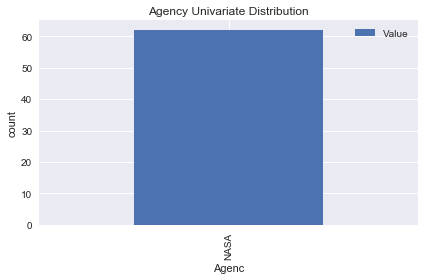

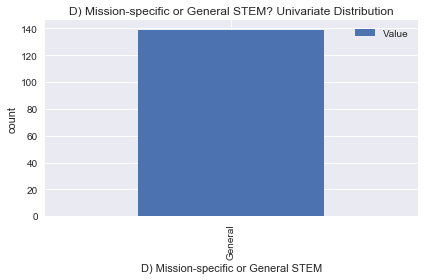

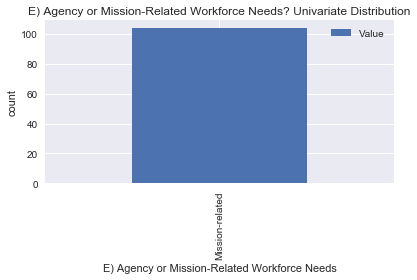

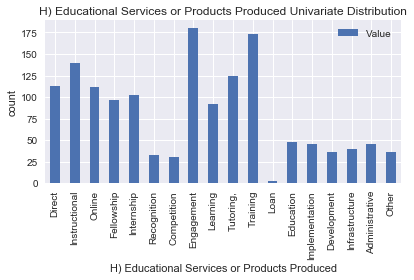

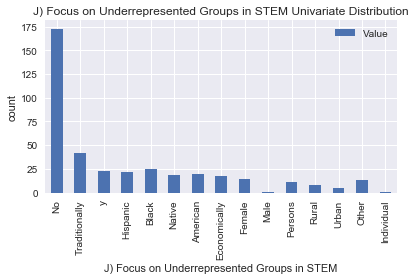

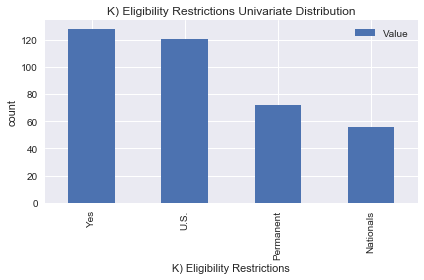

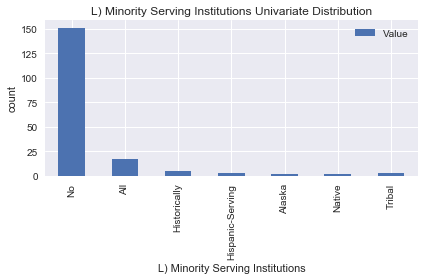

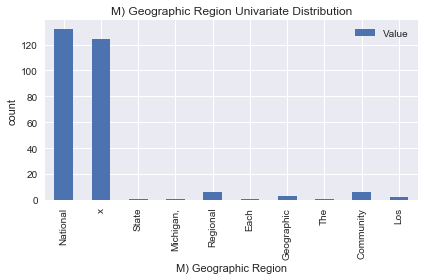

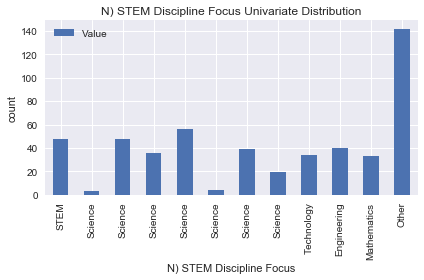

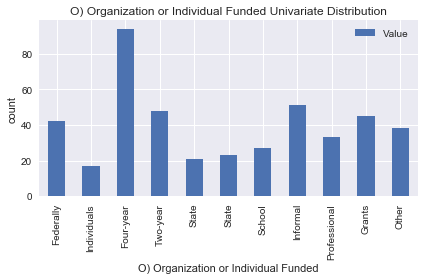

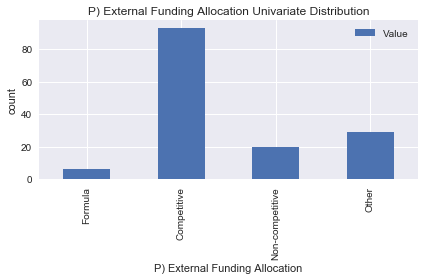

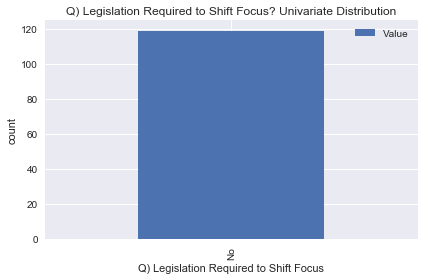

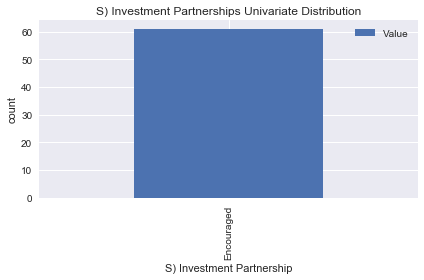

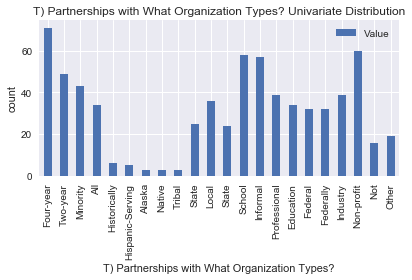

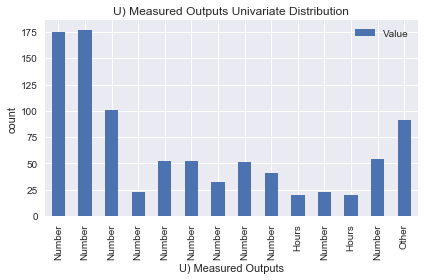

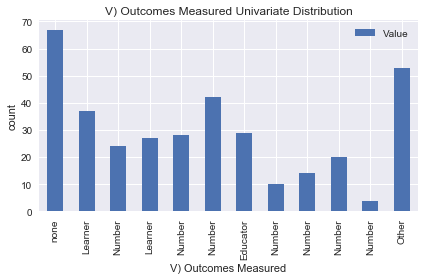

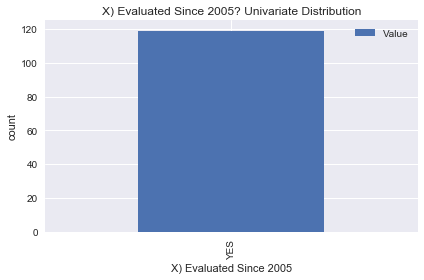

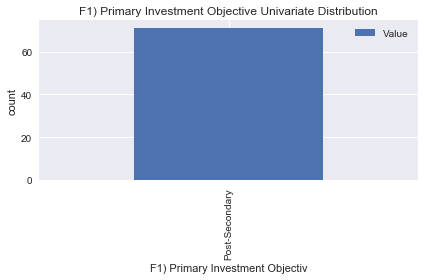

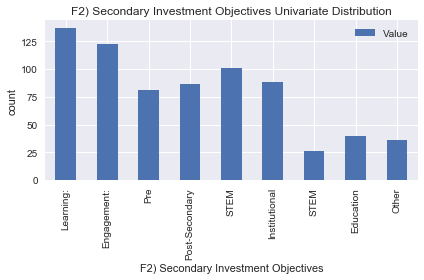

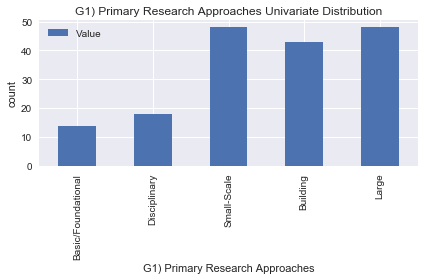

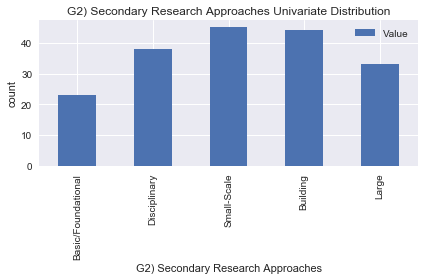

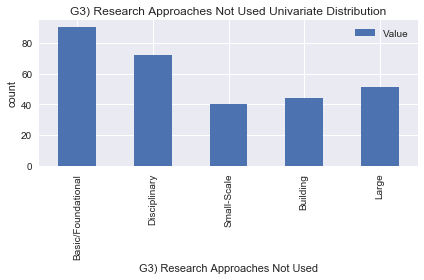

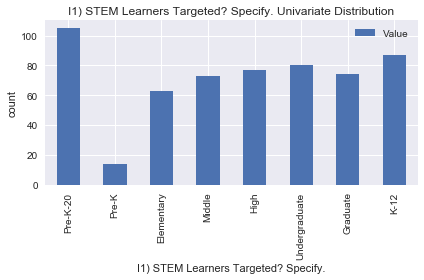

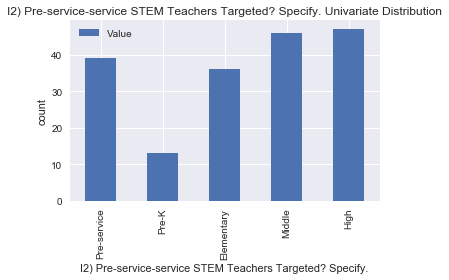

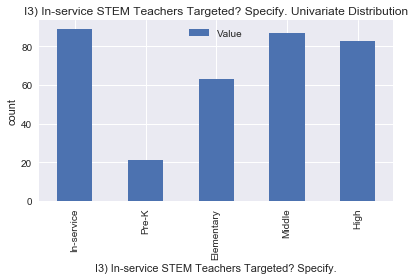

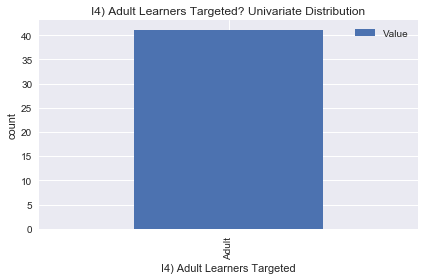

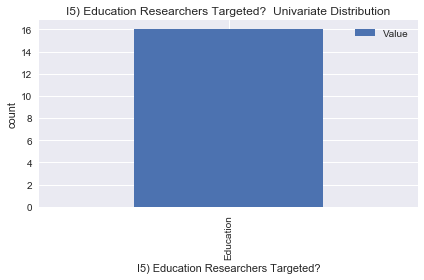

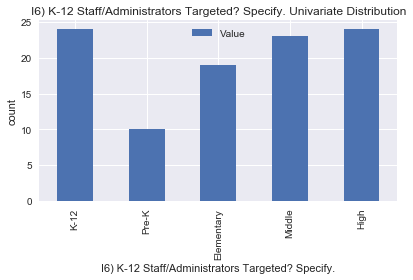

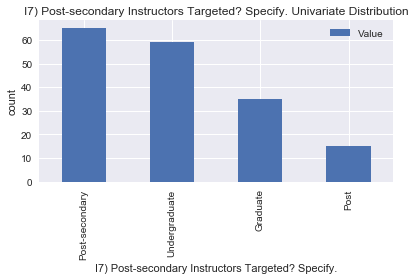

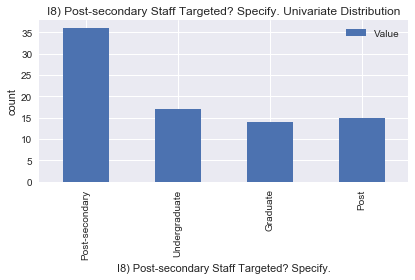

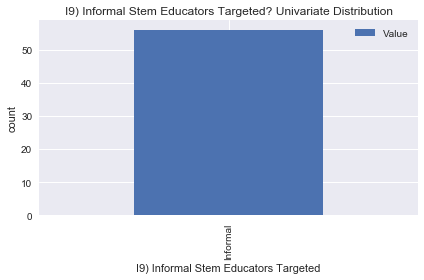

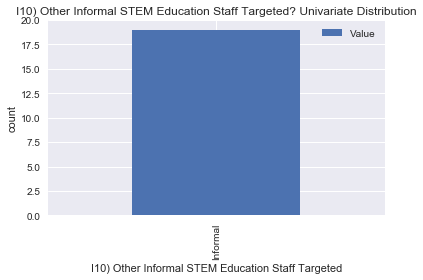

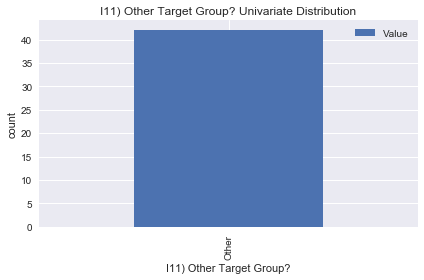

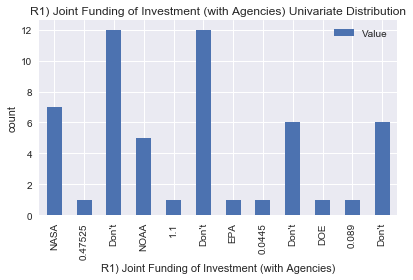

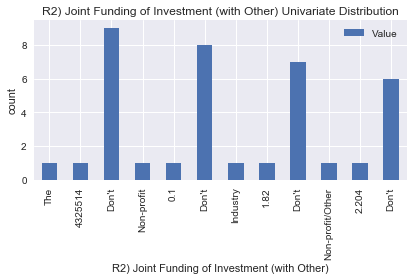

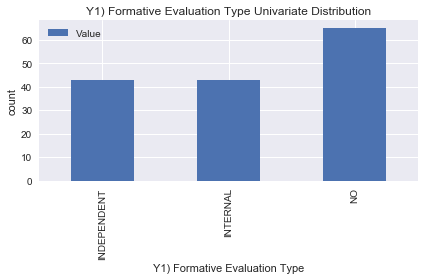

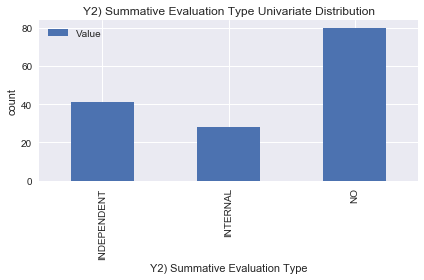

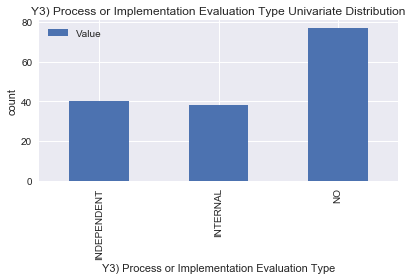

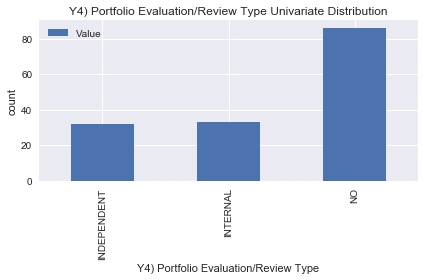

In [1046]:
def plot_graphs(group, df):
    dic = {}
    for counter, grp in enumerate(group[:-1]):
        i = 0
        lis1 = []
        lis2= []

        try:
            temp = int(grp[0][-1])
            heading = grp[0][:-1]
        except ValueError:
            heading = grp[0]
            pass
            # print(grp[0])
        for elem in (grp):


            df_temp = (pd.DataFrame(df[elem].value_counts()))

            df_temp.columns = [df_temp.columns[0][:-2]]

            for j, var in enumerate(df_temp):
                try:
                    varr = df_temp.index[j]
                    lis1.append(varr)
                    lis2.append(df_temp.values[0][j])
                except IndexError:
                    continue


            i += 1
        dic['Field'] = (lis1)
        dic['Value'] = lis2
        temp_df = pd.DataFrame(dic)
        sys.stdout.write("\r")
        sys.stdout.write("Completed %d of %d" % (counter+1, len(group)))
        sys.stdout.flush()
        plt.figure()

        temp_df['Field'] = temp_df['Field'].apply(lambda x: x.split(' ')[0] if type(x) == str else x)

        temp_df.plot(x=temp_df['Field'], kind='bar')
        plt.title(heading + " Univariate Distribution")
        plt.xlabel(grp[0][:-1])
        plt.ylabel('count')
        try:
            plt.tight_layout()
        except ValueError:
            pass
plot_graphs(group, df)

##### 2) Calculate mutual_info_score of target variable created in stage 1 & ALL non funding variables and share on a jupyter notebook.

In [183]:
df.head(3)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,% Increase,Target Variable
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.70,General STEM,NaN,...,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,8.778626,1
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.00,14.00,14.00,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.00,5.00,4.37,General STEM,NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,-12.600000,0


In [242]:
# Since there are many NaNs in the df, it won't work if I simply try to find the mutual info score.
# However, since I am dealing with string data in every column which contains NaN, so I can change all the NaNs to a 
# constant value, say "None" for instance. This will help in completing this task.

df2 = df.fillna(value='None')

# Also, let us remove the % increase column which was not present in the dataset originally

df2 = df2.drop('% Increase', axis=1)

# Also, converting all int values to str for compatibility

df2 = df2.astype(str)

In [243]:
df2.head(3)

,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,...,Y2) Summative Evaluation Type2,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,Target Variable
PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,None,...,None,None,None,NO,INDEPENDENT,None,None,INDEPENDENT,None,1
PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14.0,14.0,14.0,General STEM,None,...,None,None,None,NO,None,None,NO,None,None,1
PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5.0,5.0,4.37,General STEM,None,...,None,None,None,NO,None,None,NO,None,None,0


In [993]:
# now, we can easily calculate mutual info score using a loop
def get_mutual_info_score(df2):
    mutual_info_score_with_target_variable = {}
    lis1 = []
    lis2 = []

    banned_cols = ['C1) Funding FY2008','C2) Funding FY2009','C3) Funding FY2010']
    for i, col in enumerate(df2.columns):
        if col in banned_cols:
            continue
        else:
            sys.stdout.write("\r")
            sys.stdout.write("Iteration %d of %d" % (i+1, len(df2.columns)))
            sys.stdout.flush()
            lis1.append(col)
            lis2.append(mutual_info_score(df2['Target Variable'], df2[col]))

    mutual_info_score_with_target_variable['Non-Funding Variable'] = lis1
    mutual_info_score_with_target_variable['Mutual Info Score'] = lis2
    return mutual_info_score_with_target_variable
    
mutual_info_score_with_target_variable = get_mutual_info_score(df2)

Iteration 256 of 256

In [994]:
mutual_info_score_with_target_variable = pd.DataFrame(mutual_info_score_with_target_variable)
mutual_info_score_with_target_variable.head(3)

,Mutual Info Score,Non-Funding Variable
0,0.519580,Investment Name
1,0.029045,Agency
2,0.146462,Subagency


## Stage 3

##### 1) Divide data into train & test samples. (70-30 split)

In [923]:
X = df
X.columns

Index(['Agency', 'B) Year Established', 'C1) Funding FY2008',
       'C2) Funding FY2009', 'C3) Funding FY2010',
       'D) Mission-specific or General STEM?',
       'E) Agency or Mission-Related Workforce Needs?',
       'F1) Primary Investment Objective',
       'F2) Secondary Investment Objectives0',
       'F2) Secondary Investment Objectives1',
       ...
       'Y2) Summative Evaluation Type2',
       'Y3) Process or Implementation Evaluation Type0',
       'Y3) Process or Implementation Evaluation Type1',
       'Y3) Process or Implementation Evaluation Type2',
       'Y4) Portfolio Evaluation/Review Type0',
       'Y4) Portfolio Evaluation/Review Type1',
       'Y4) Portfolio Evaluation/Review Type2', 'Y5) Expert Review Type0',
       'Y5) Expert Review Type1', 'Target Variable'],
      dtype='object', length=241)

In [924]:
l1 = []
l2 = []
collect = {}
for col in X.columns:
    l1.append(col)
    l2.append(len(X[col].unique()))
    
collect['Column Name'] = l1
collect['Unique Count'] = l2
count_df = pd.DataFrame(collect)
count_df

,Column Name,Unique Count
0,Agency,13
1,B) Year Established,48
2,C1) Funding FY2008,197
3,C2) Funding FY2009,217
4,C3) Funding FY2010,217
5,D) Mission-specific or General STEM?,2
6,E) Agency or Mission-Related Workforce Needs?,3
7,F1) Primary Investment Objective,7
8,F2) Secondary Investment Objectives0,2
9,F2) Secondary Investment Objectives1,2


In [925]:
for row in count_df.iterrows():
    if row[1]['Unique Count'] > 13:
        if row[1]['Column Name'] not in ['B) Year Established', 'C1) Funding FY2008', 'C2) Funding FY2009', 'C3) Funding FY2010']:
            X.drop([row[1]['Column Name']], axis=1, inplace=True)
    else:
        pass
    
X

,Agency,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,F2) Secondary Investment Objectives0,F2) Secondary Investment Objectives1,...,Y2) Summative Evaluation Type2,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0,Y5) Expert Review Type1,Target Variable
PRG_0001,National Science Foundation,2002,5.240000,7.190000,5.700000,General STEM,NaN,Institutional Capacity: Support advancement an...,"Learning: Develop STEM skills, practices, or k...","Engagement: Increase learners’ engagement, int...",...,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,1
PRG_0002,National Science Foundation,2006,14.000000,14.000000,14.000000,General STEM,NaN,"Engagement: Increase learners’ engagement, int...","Learning: Develop STEM skills, practices, or k...",NaN,...,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,1
PRG_0003,National Science Foundation,2007,5.000000,5.000000,4.370000,General STEM,NaN,Institutional Capacity: Support advancement an...,NaN,NaN,...,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0
PRG_0004,National Science Foundation,2002,4.570000,11.790000,4.180000,General STEM,NaN,"Engagement: Increase learners’ engagement, int...","Learning: Develop STEM skills, practices, or k...",NaN,...,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,0
PRG_0005,National Science Foundation,1999,1.630000,2.740000,2.020000,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",NaN,"Engagement: Increase learners’ engagement, int...",...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,1
PRG_0006,National Science Foundation,2006,3.000000,3.000000,2.980000,General STEM,NaN,Pre and In Service Educator/Education Leader P...,"Learning: Develop STEM skills, practices, or k...",NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0
PRG_0007,National Science Foundation,1995,1.100000,1.120000,1.100000,General STEM,NaN,"Engagement: Increase learners’ engagement, int...","Learning: Develop STEM skills, practices, or k...",NaN,...,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,1
PRG_0008,National Science Foundation,1952,96.020000,162.430000,136.130000,General STEM,NaN,Post-Secondary STEM Degrees: Increase the numb...,"Learning: Develop STEM skills, practices, or k...","Engagement: Increase learners’ engagement, int...",...,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,1
PRG_0009,National Science Foundation,1997,64.760000,77.990000,69.700000,General STEM,NaN,Post-Secondary STEM Degrees: Increase the numb...,"Learning: Develop STEM skills, practices, or k...","Engagement: Increase learners’ engagement, int...",...,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,1
PRG_0010,National Science Foundation,1999,54.600000,58.840000,55.970000,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",NaN,"Engagement: Increase learners’ engagement, int...",...,NO,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,1


In [926]:
X = X[pd.notnull(X['B) Year Established'])]

In [927]:
y = X['Target Variable']
X = X[X.columns[:-2]]
X.columns

Index(['Agency', 'B) Year Established', 'C1) Funding FY2008',
       'C2) Funding FY2009', 'C3) Funding FY2010',
       'D) Mission-specific or General STEM?',
       'E) Agency or Mission-Related Workforce Needs?',
       'F1) Primary Investment Objective',
       'F2) Secondary Investment Objectives0',
       'F2) Secondary Investment Objectives1',
       ...
       'Y2) Summative Evaluation Type0', 'Y2) Summative Evaluation Type1',
       'Y2) Summative Evaluation Type2',
       'Y3) Process or Implementation Evaluation Type0',
       'Y3) Process or Implementation Evaluation Type1',
       'Y3) Process or Implementation Evaluation Type2',
       'Y4) Portfolio Evaluation/Review Type0',
       'Y4) Portfolio Evaluation/Review Type1',
       'Y4) Portfolio Evaluation/Review Type2', 'Y5) Expert Review Type0'],
      dtype='object', length=239)

##### 2) Select features & build xgboost model. You will be judged on roc_auc_score on test sample.

In [1015]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [929]:
X

,Agency,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,F2) Secondary Investment Objectives0,F2) Secondary Investment Objectives1,...,Y2) Summative Evaluation Type0,Y2) Summative Evaluation Type1,Y2) Summative Evaluation Type2,Y3) Process or Implementation Evaluation Type0,Y3) Process or Implementation Evaluation Type1,Y3) Process or Implementation Evaluation Type2,Y4) Portfolio Evaluation/Review Type0,Y4) Portfolio Evaluation/Review Type1,Y4) Portfolio Evaluation/Review Type2,Y5) Expert Review Type0
PRG_0001,National Science Foundation,2002,5.240000,7.190000,5.700000,General STEM,NaN,Institutional Capacity: Support advancement an...,"Learning: Develop STEM skills, practices, or k...","Engagement: Increase learners’ engagement, int...",...,INDEPENDENT,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT
PRG_0002,National Science Foundation,2006,14.000000,14.000000,14.000000,General STEM,NaN,"Engagement: Increase learners’ engagement, int...","Learning: Develop STEM skills, practices, or k...",NaN,...,INDEPENDENT,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN
PRG_0003,National Science Foundation,2007,5.000000,5.000000,4.370000,General STEM,NaN,Institutional Capacity: Support advancement an...,NaN,NaN,...,INDEPENDENT,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN
PRG_0004,National Science Foundation,2002,4.570000,11.790000,4.180000,General STEM,NaN,"Engagement: Increase learners’ engagement, int...","Learning: Develop STEM skills, practices, or k...",NaN,...,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT
PRG_0005,National Science Foundation,1999,1.630000,2.740000,2.020000,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",NaN,"Engagement: Increase learners’ engagement, int...",...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN
PRG_0006,National Science Foundation,2006,3.000000,3.000000,2.980000,General STEM,NaN,Pre and In Service Educator/Education Leader P...,"Learning: Develop STEM skills, practices, or k...",NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN
PRG_0007,National Science Foundation,1995,1.100000,1.120000,1.100000,General STEM,NaN,"Engagement: Increase learners’ engagement, int...","Learning: Develop STEM skills, practices, or k...",NaN,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN
PRG_0008,National Science Foundation,1952,96.020000,162.430000,136.130000,General STEM,NaN,Post-Secondary STEM Degrees: Increase the numb...,"Learning: Develop STEM skills, practices, or k...","Engagement: Increase learners’ engagement, int...",...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT
PRG_0009,National Science Foundation,1997,64.760000,77.990000,69.700000,General STEM,NaN,Post-Secondary STEM Degrees: Increase the numb...,"Learning: Develop STEM skills, practices, or k...","Engagement: Increase learners’ engagement, int...",...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT
PRG_0010,National Science Foundation,1999,54.600000,58.840000,55.970000,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",NaN,"Engagement: Increase learners’ engagement, int...",...,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT


In [930]:
new_X = pd.DataFrame(index=[X.index])
intOrFloatCols = ['B) Year Established', 'C1) Funding FY2008', 'C2) Funding FY2009', 'C3) Funding FY2010', 'R1) Joint Funding of Investment (with Agencies)2', 'R1) Joint Funding of Investment (with Agencies)5', 'R1) Joint Funding of Investment (with Agencies)8', 'R1) Joint Funding of Investment (with Agencies)11', 'R2) Joint Funding of Investment (with Other)1', 'R2) Joint Funding of Investment (with Other)4', 'R2) Joint Funding of Investment (with Other)7', 'R2) Joint Funding of Investment (with Other)10']
for col in X.columns:
    if col in intOrFloatCols:
        new_X = pd.concat([new_X, X[col]], axis=1)
    else:
        dummies = pd.get_dummies(X[col])
        new_X = pd.concat([new_X, dummies], axis=1)
    
new_X


,Agriculture,Commerce,Defense,Education,Energy,Environmental Protection Agency,Health & Human Services,Homeland Security,Interior,NASA,...,INDEPENDENT,INTERNAL,NO,INDEPENDENT,INTERNAL,NO,INDEPENDENT,INTERNAL,NO,INDEPENDENT
PRG_0001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
PRG_0002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
PRG_0003,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
PRG_0004,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
PRG_0005,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
PRG_0006,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
PRG_0007,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
PRG_0008,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
PRG_0009,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
PRG_0010,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1


In [931]:
# new_X = new_X.dropna(axis=0)
new_X['B) Year Established'] = (new_X['B) Year Established']).astype(int)
new_X

,Agriculture,Commerce,Defense,Education,Energy,Environmental Protection Agency,Health & Human Services,Homeland Security,Interior,NASA,...,INDEPENDENT,INTERNAL,NO,INDEPENDENT,INTERNAL,NO,INDEPENDENT,INTERNAL,NO,INDEPENDENT
PRG_0001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
PRG_0002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
PRG_0003,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
PRG_0004,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
PRG_0005,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
PRG_0006,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
PRG_0007,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
PRG_0008,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
PRG_0009,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
PRG_0010,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1


In [932]:
liss = []
for i, col in enumerate(new_X.columns):
    # print(col)
    try:
        liss.append(col + str(i))
    except TypeError:
        print(col)
len(liss)

358

In [933]:
new_X.columns = liss

In [934]:
new_X= new_X.fillna(0)
new_X.drop('R2) Joint Funding of Investment (with Other)1258', axis=1, inplace=True)

In [935]:
a = 'Small-Scale Implementation: STEM education projects, techniques, models, resources, and/or technologies used with a relatively small group of learners or educators in one or several (<10) classrooms, museums, schools, etc.39'
new_X.rename(columns={a:a.replace('<', ' LESS THAN ')}, inplace=True)
b = 'Small-Scale Implementation: STEM education projects, techniques, models, resources, and/or technologies used with a relatively small group of learners or educators in one or several (<10) classrooms, museums, schools, etc.44'
new_X.rename(columns={b:b.replace('<', ' LESS THAN ')}, inplace=True)
c = 'Small-Scale Implementation: STEM education projects, techniques, models, resources, and/or technologies used with a relatively small group of learners or educators in one or several (<10) classrooms, museums, schools, etc.49'
new_X.rename(columns={c:c.replace('<', ' LESS THAN ')}, inplace=True)

In [942]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.3)
X_train

,Agriculture0,Commerce1,Defense2,Education3,Energy4,Environmental Protection Agency5,Health & Human Services6,Homeland Security7,Interior8,NASA9,...,INDEPENDENT348,INTERNAL349,NO350,INDEPENDENT351,INTERNAL352,NO353,INDEPENDENT354,INTERNAL355,NO356,INDEPENDENT357
PRG_0001,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
PRG_0212,0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,1,1,0,1
PRG_0027,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
PRG_0050,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
PRG_0180,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
PRG_0004,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
PRG_0066,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
PRG_0201,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
PRG_0210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRG_0240,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [943]:

# fit model on training data
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [944]:
y_pred = model.predict(X_test)

In [945]:
y_test = np.array(y_test)

In [946]:
incorrect = 0
correct = 0
for x, y in zip(y_pred, y_test):
    if x == y:
        correct += 1
    else:
        incorrect += 1
print("Correctly classified: {}, Incorrectly Classified = {}".format(correct, incorrect))

Correctly classified: 57, Incorrectly Classified = 16


In [947]:
score = correct / (correct + incorrect)
score

0.7808219178082192

In [938]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBClassifier(), new_X, y, cv=10, scoring='roc_auc')

In [940]:
scores.mean()

0.76795321637426894

In [956]:
print("ROC AUC SCORE = {}".format(scores.mean()))

ROC AUC SCORE = 0.7679532163742689


##### Stage 3 - Task 3 - Pytest

In [1014]:
# SEE FILE test_file.py
